새로운 데이터가 추가 될 때 마다 기존에 훈련한 모델을 잃지 않는 수준에서 새로운 데이터에 대해 더 훈련을 시키는 방식을 점직적 학습, 또는 온라인 학습이라고 부른다.<br/>
대표적인 점진적 학습 알고리즘은 확률적 경사 하강법이다.<br/>
확률적 경사 하강법(Stochastic Gradient Descent, SGD)은 훈련 세트에서 샘플을 랜덤하게(확률적으로) 하나씩 꺼내서 손실 함수의 경사를 따라 최적의 모델을 찾는 알고리즘이다.<br/>
만약 모든 샘플을 다 사용하여도 최적의 모델을 찾지 못했다면, 훈련 세트에 모든 샘플을 다시 채워넣고 작업을 반복한다.<br/>
확률적 경사 하강법에서 훈련세트를 한 번 모두 사용하는 과정을 에포크(epoch)라고 부르고, 일반적으로 수십, 수백번 이상의 에포크를 수행하게 된다.<br/>
 만약 샘플을 하나씩 꺼내지 않고 여러개씩 꺼내어 작업을 수행하면 미니배치 경사 하강법(Minibatch Gradient Descent), 전체 샘플을 한번에 사용하면 배치 경사 하강법(Batch Gradient Descent)라고 한다.<br/>
 샘플을 많이 사용할 경우 안정성이 높아지지만, 그만큼 컴퓨터 자원을 많이 사용하게 되는 단점이 있다.

손실함수(loss function)는 어떤 문제에서 머신러닝 알고리즘이 얼마나 얼터리인지를 측정하는 기준이다. 값이 작을수록 좋지만 어떤 값이 최솟값인지 알지 못하기 때문에 가능한 많이 찾아보고 만족할 만한 수준이면 작업을 종료한다.<br/>
이진분류에 사용되는 손실 함수를 로지스틱 손실 함수(logistic loss function) 혹은 이진 크로스엔트로피 손실 함수(binary cross-entropy loss function)라고 부른다.<br/>
다중 분류의 경우 이진분류 때와 매우 비슷한 함수를 이용하는데 이를 크로스엔트로피 손실 함수(cross-entropy loss function)라고 부른다.<br/>
이러한 손실함수들은 머신러닝 라이브러리가 처리해 주기 때문에 직접 계산하는 일은 드물다.

In [5]:
import pandas as pd     #데이터 준비

fish = pd.read_csv('https://bit.ly/fish_csv')     #판다스 데이터프레임 생성

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()     #넘파이로 변환 입력
fish_target = fish['Species'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split     #훈련, 테스트 세트 생성

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler      #표준화 전처리

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)      #훈련 세트에서 학습한 통계값으로 테스트세트도 변환해야함

In [8]:
from sklearn.linear_model import SGDClassifier      #확률적 경사 하강법을 제공하는 대표적 분류용 클래스

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)      #loss:손실함수의 종류, log는 로지스틱 손실 함수, max_iter:수행할 에포크 횟수
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))     #ConvergenceWarning : 모델이 충분히 수렴하지 않았다는 경고

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [9]:
sc.partial_fit(train_scaled, train_target)      #partial_fit() : 호출할 때 마다 1에포크씩 이어서 훈련함
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))       #점진적 학습 결과 정확도가 향상됨.

0.8151260504201681
0.825


확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있다.<br/>
적은 에포크 횟수 동안은 훈련세트와 테스트 세트에 잘 맞지 않는 과소적합된 모델일 가능성이 높고, 많은 에포크 횟수 동안은 훈련세트에 너무 잘맞아 테스트 세트에는 오히려 점수가 나쁜 과대적합된 모델일 가능성이 높다<br/>
과대적합이 시작하기 전에 훈련을 멈추는 것을 조기종료(early stopping)이라고 부른다.<br/>
준비된 데이테 셋을 통해 이를 그래프로 표현해 보자.

In [10]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score =[]
classes = np.unique(train_target)

for _ in range(0, 300):      #파이썬의 _는 나중에 사용하지 않고 그냥 버리는 값을 넣어두는 용도로 사용한다.
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

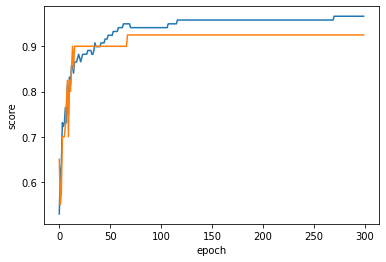

In [11]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('score')
plt.show()      #그래프 확인 결과 에포크 100이 적절할 것으로 보임

In [13]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
#SGDClassifier()는 일정 에포크동안 성능이 향상되지 않으면 자동으로 멈춘다. tol 매개변수를 통해 이 에포크를 지정할 수 있다. None으로 지정하여 멈추지 않게 설정했다.
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [15]:
sc = SGDClassifier(max_iter=100, tol=None, random_state=42)
#SGDClassifier()의 손실함수 기본값은 'hinge'이며 이는 서포트 벡터 머신이라고 불리는 머신러닝 알고리즘을 위한 손실함수이다. 지금은 그 존재만 짚고 넘어가자.
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
